In [1]:
#importing libraries

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
# specifying time duration for analysis of data

In [3]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2022, 1, 1)

In [4]:
# using data-readers for grabbing information of bank stocks from yahoo finance site

In [5]:
# Punjab National Bank
PNB = data.DataReader("PNB.NS", 'yahoo', start, end)

In [7]:
# HDFC Bank
HDFC = data.DataReader("HDFCBANK.NS", 'yahoo', start, end)

In [10]:
# ICICI Bank Ltd
ICICI = data.DataReader("ICICIBANK.NS", 'yahoo', start, end)

In [11]:
# Kotak Mahindra Bank Ltd
KOTAK = data.DataReader("KOTAKBANK.NS", 'yahoo', start, end)

In [13]:
# Bank of India
BOI = data.DataReader("BANKINDIA.BO", 'yahoo', start, end)

In [14]:
# Yes Bank Limited
YES = data.DataReader("YESBANK.NS", 'yahoo', start, end)

In [15]:
# creating a list of tickers for banks
tickers = ['HDFC', 'ICICI', 'KOTAK', 'BOI', 'PNB','YES']

In [16]:
# Concatenating all bank data-frames into single data frame bank_stocks
bank_stocks = pd.concat([HDFC,ICICI,KOTAK,BOI,PNB,YES],axis=1,keys=tickers)

In [17]:
# setting column names
bank_stocks.columns.names = ['Ticker','Stock Info']

In [18]:
# EDA of bank-stocks to collect various information of stocks
# Finding date of max close price
max_date = bank_stocks.xs(key='Close',axis=1,level='Stock Info').idxmax()
max_date

Ticker
HDFC    2021-10-19
ICICI   2021-10-25
KOTAK   2021-10-26
BOI     2012-02-21
PNB     2014-12-18
YES     2018-08-20
dtype: datetime64[ns]

In [19]:
# Max close price of each bank
max_close = bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()
max_close

Ticker
HDFC     1688.699951
ICICI     841.700012
KOTAK    2210.949951
BOI       396.600006
PNB       226.000000
YES       394.000000
dtype: float64

In [28]:
# combining max date with max close price dataframe
df_ClosePrice = [max_date,max_close]
newDf = pd.concat(df_ClosePrice,axis=1)
newDf.columns =['Date', 'ClosePrice']
newDf
#df_cd = pd.merge(max_date, max_close, how='inner', left_on = 'Id', right_on = 'Id')
#df_cd 
#error generated

,Date,ClosePrice
Ticker,,
HDFC,2021-10-19,1688.699951
ICICI,2021-10-25,841.700012
KOTAK,2021-10-26,2210.949951
BOI,2012-02-21,396.600006
PNB,2014-12-18,226.000000
YES,2018-08-20,394.000000


In [21]:
# Min close price of each bank
for ticker in tickers:
    print(ticker,bank_stocks[ticker]['Close'].max())

HDFC 1688.699951171875
ICICI 841.7000122070312
KOTAK 2210.949951171875
BOI 396.6000061035156
PNB 226.0
YES 394.0


In [64]:
# Date of Min close price of each bank
min_date = bank_stocks.xs(key='Close',axis=1,level='Stock Info').idxmin()
min_date

Ticker
HDFC    2012-01-02
ICICI   2012-01-02
KOTAK   2012-01-02
BOI     2020-05-19
PNB     2020-05-19
YES     2021-08-23
dtype: datetime64[ns]

In [32]:
# Max volume of each bank
bank_stocks.xs(key='Volume',axis=1,level='Stock Info').max()

Ticker
HDFC     2.011300e+08
ICICI    2.868577e+08
KOTAK    8.385990e+07
BOI      8.370255e+06
PNB      5.118155e+08
YES      1.057367e+09
dtype: float64

In [65]:
# Date for Max volume of each bank
max_dateVolume = bank_stocks.xs(key='Close',axis=1,level='Stock Info').idxmax()
max_dateVolume

Ticker
HDFC    2021-10-19
ICICI   2021-10-25
KOTAK   2021-10-26
BOI     2012-02-21
PNB     2014-12-18
YES     2018-08-20
dtype: datetime64[ns]

In [33]:
# finding percentage returns of each stock

In [29]:
#creating an empty data-frame named "returns" and filling it
returns = pd.DataFrame()

In [30]:
for tick in tickers:
    returns[tick+' Returns'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,HDFC Returns,ICICI Returns,KOTAK Returns,BOI Returns,PNB Returns,YES Returns
Date,,,,,,
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,0.028816,0.041993,0.066864,0.076837,0.046786,0.060600
2012-01-04,0.009450,0.023836,-0.023558,-0.000521,-0.004364,-0.019723
2012-01-05,0.000790,0.006729,0.013884,-0.006253,0.035312,0.028210
2012-01-06,0.021751,0.004812,0.019082,0.012760,-0.017537,0.007868


In [31]:
# using seaborn create a pairplot of returns dataframe
import seaborn as sns
import matplotlib.pyplot as plt

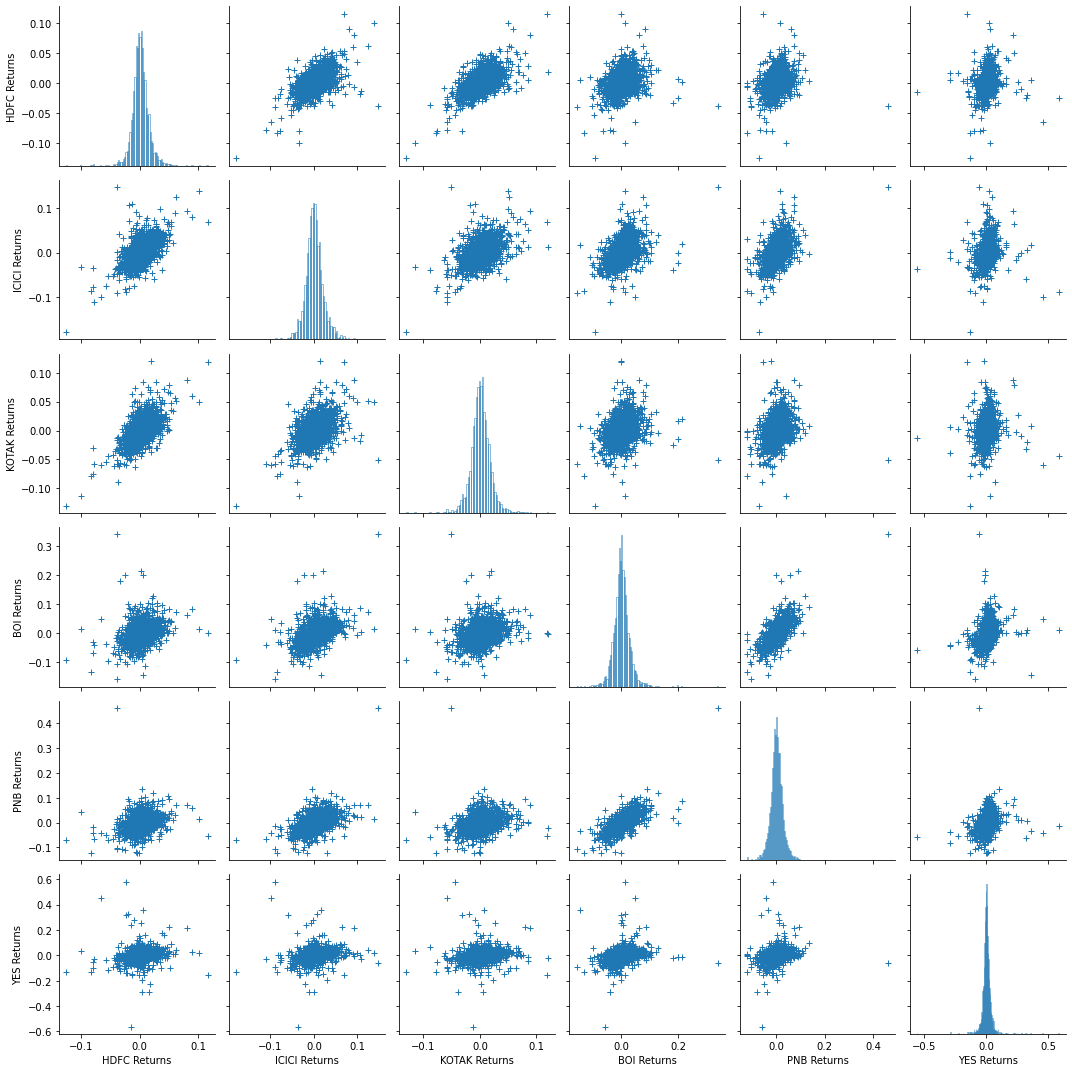

In [30]:
sns.pairplot(returns,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),)
plt.tight_layout()

In [67]:
# worst single day returns
returns['HDFC Returns'].min()

-0.12606897080005042

In [32]:
returns.idxmin()

HDFC Returns    2020-03-23
ICICI Returns   2020-03-23
KOTAK Returns   2020-03-23
BOI Returns     2015-08-24
PNB Returns     2020-03-12
YES Returns     2020-03-06
dtype: datetime64[ns]

In [33]:
# best single day returns
returns.idxmax()

HDFC Returns    2020-03-25
ICICI Returns   2017-10-25
KOTAK Returns   2020-10-27
BOI Returns     2017-10-25
PNB Returns     2017-10-25
YES Returns     2020-03-17
dtype: datetime64[ns]

In [36]:
# finding standard deviation of returns   
# maximum for yes bank
returns.std()

HDFC Returns     0.014631
ICICI Returns    0.021570
KOTAK Returns    0.017823
BOI Returns      0.029165
PNB Returns      0.027493
YES Returns      0.039668
dtype: float64

In [156]:
# std deviation for financial year 2020 during covid pandemic
returns.loc['2020-01-01':'2020-12-31'].std()

HDFC Returns     0.025887
ICICI Returns    0.033549
KOTAK Returns    0.028938
BOI Returns      0.030252
PNB Returns      0.030492
YES Returns      0.080125
dtype: float64

C:\Users\HP Pavillon gaming\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YES Returns', ylabel='Density'>

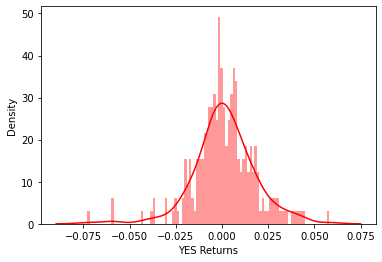

In [188]:
# distribution plots for financial year 2020
sns.distplot(returns.loc['2017-01-01':'2017-12-31']['YES Returns'],color='red',bins=100,kde=True)

C:\Users\HP Pavillon gaming\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YES Returns', ylabel='Density'>

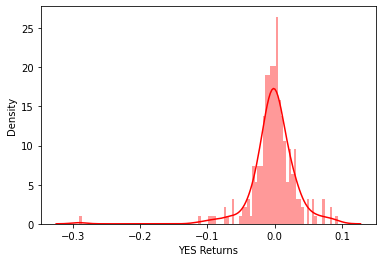

In [187]:
sns.distplot(returns.loc['2018-01-01':'2018-12-31']['YES Returns'],color='red',bins=100,kde=True)

In [69]:
# Visualizations of other data

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


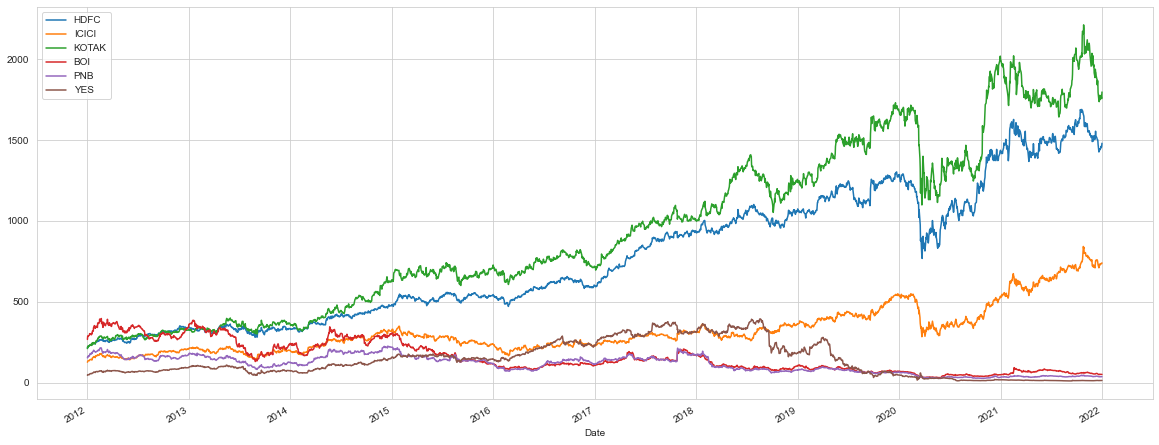

In [39]:
#bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(20,8),label=tick)
plt.legend()

Moving Average

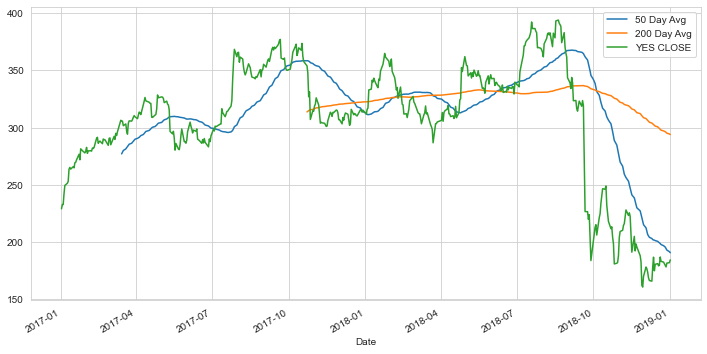

In [77]:
plt.figure(figsize=(12,6))
YES['Close'].loc['2017-01-01':'2019-01-01'].rolling(window=50).mean().plot(label='50 Day Avg')
YES['Close'].loc['2017-01-01':'2019-01-01'].rolling(window=200).mean().plot(label='200 Day Avg')
YES['Close'].loc['2017-01-01':'2019-01-01'].plot(label='YES CLOSE')
plt.legend()

<AxesSubplot:xlabel='Ticker', ylabel='Ticker'>

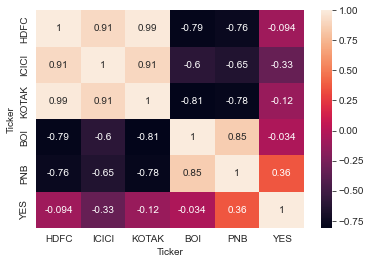

In [84]:
# heatmap of the correlation between the stocks Close Price
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

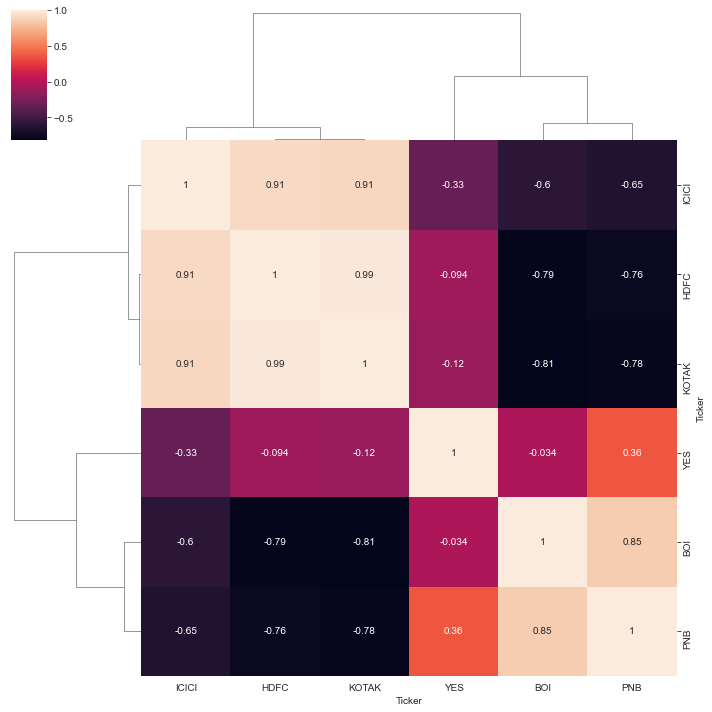

In [85]:
#seaborn's cluster map to cluster the correlations together:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)